In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # express is another package of plotly
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_column',30)

In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba   
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  \
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe   
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no  \
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

In [4]:
df.id

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

# remove the id column because it will not help to find any pattern in Data

In [5]:
df.drop('id',axis = 1,inplace=True)

In [6]:
df

age    bp     sg   al   su     rbc        pc         pcc          ba   
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  \
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   
0    121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good  \
1      NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   
2    423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   
3    117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor   
4    106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   
..     ...   ...  ...    ...  ...   ...  ..   ...  ...  ...  ...  ..   ...   
395  140.0  49.0  0.5  150.0  4.9  15.7  47  6700  4.9   no   no  no  good   
396   75.0  31.0  1.2  141.0  3.5  16.5  54  7800  6.2   no   no  no  good   
397  100.0  26.0  0.6  137.0  4.4  15.8  49  6600  5.4   no   no  no  good   
398  114.0  50.0  1.0  135.0  4.9  14.2  51  7200  5.9   no   no  no  good   
399  131.0  18.0  1.1  141.0  3.5  15.8  53  6800  6.1   no   no  no  good   

      pe  ane classification  
0     no   no            ckd  
1     no   no            ckd  
2     no  yes            ckd  
3    yes  yes            ckd  
4     no   no            ckd  
..   ...  ...            ...  
395   no   no         notckd  
396   no   no         notckd  
397   no   no         notckd  
398   no   no         notckd  
399   no   no         notckd  

[400 rows x 25 columns]

In [7]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
# change the column name
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

# convert above column in numerical data

In [12]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume,errors = 'coerce')


In [13]:
df['packed_cell_volume'] 

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [14]:
df['white_blood_cell_count']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

In [15]:
# df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float,errors='raise')
df['white_blood_cell_count'] = pd.to_numeric(df.white_blood_cell_count,errors = 'coerce')


In [16]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [17]:
df['red_blood_cell_count'] = pd.to_numeric(df.red_blood_cell_count,errors = 'coerce')


In [18]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

# How to find categorical and numerical data

In [19]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [20]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [21]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

# how to find unique value in categorial column

In [22]:
for col in cat_cols:
    print(f"Unique Value in {col} is {df[col].unique()} ")
print()

Unique Value in red_blood_cells is [nan 'normal' 'abnormal'] 
Unique Value in pus_cell is ['normal' 'abnormal' nan] 
Unique Value in pus_cell_clumps is ['notpresent' 'present' nan] 
Unique Value in bacteria is ['notpresent' 'present' nan] 
Unique Value in hypertension is ['yes' 'no' nan] 
Unique Value in diabetes_mellitus is ['yes' 'no' ' yes' '\tno' '\tyes' nan] 
Unique Value in coronary_artery_disease is ['no' 'yes' '\tno' nan] 
Unique Value in appetite is ['good' 'poor' nan] 
Unique Value in peda_edema is ['no' 'yes' nan] 
Unique Value in aanemia is ['no' 'yes' nan] 
Unique Value in class is ['ckd' 'ckd\t' 'notckd'] 



# in above columns replace the value with '\' or nan type

In [23]:
df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace = True)

In [24]:
for col in cat_cols:
    print(f"Unique Value in {col} is {df[col].unique()} ")
print()

Unique Value in red_blood_cells is [nan 'normal' 'abnormal'] 
Unique Value in pus_cell is ['normal' 'abnormal' nan] 
Unique Value in pus_cell_clumps is ['notpresent' 'present' nan] 
Unique Value in bacteria is ['notpresent' 'present' nan] 
Unique Value in hypertension is ['yes' 'no' nan] 
Unique Value in diabetes_mellitus is ['yes' 'no' nan] 
Unique Value in coronary_artery_disease is ['no' 'yes' '\tno' nan] 
Unique Value in appetite is ['good' 'poor' nan] 
Unique Value in peda_edema is ['no' 'yes' nan] 
Unique Value in aanemia is ['no' 'yes' nan] 
Unique Value in class is ['ckd' 'ckd\t' 'notckd'] 



In [25]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace='\tno',value='no')

In [26]:
df['coronary_artery_disease']

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: coronary_artery_disease, Length: 400, dtype: object

In [27]:
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd','notckd':'not ckd'})

In [28]:
df['class'].unique()

array(['ckd', 'not ckd'], dtype=object)

# How i can convert df['class'] in integer

In [96]:
df['class']

0          ckd
1          ckd
2          ckd
3          ckd
4          ckd
        ...   
395    not ckd
396    not ckd
397    not ckd
398    not ckd
399    not ckd
Name: class, Length: 400, dtype: object

In [108]:
df['class'] = df['class'].map({'ckd':0,'not ckd':1})

In [110]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [99]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

# Univariate analysis

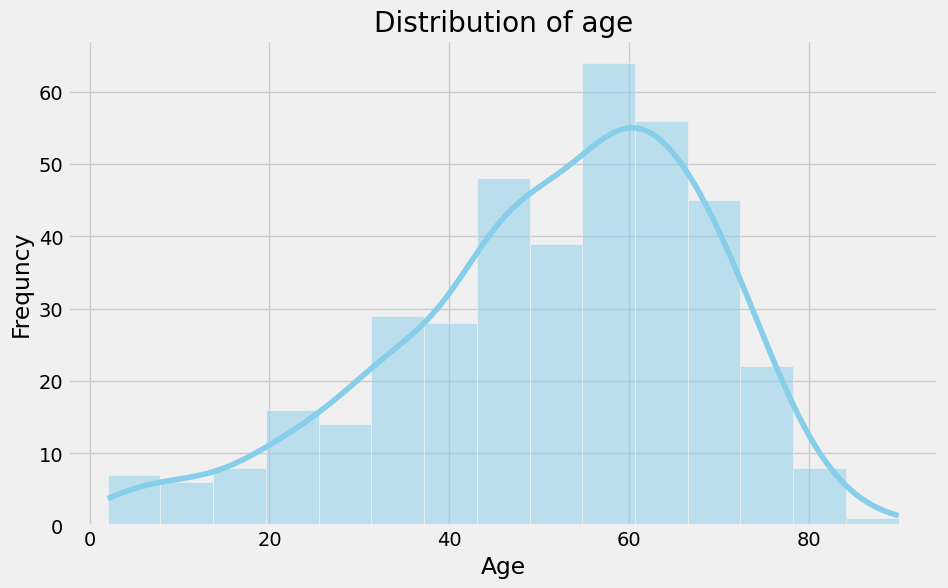

In [32]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde=True,color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel("Age")
plt.ylabel("Frequncy")
plt.show()

# insights:
1. mean age around 40-60
2. more people are younger 

# How many people have cronic disease hypertension

In [33]:
df['hypertension'].value_counts()

hypertension
no     251
yes    147
Name: count, dtype: int64

In [34]:
df['hypertension'].value_counts(normalize=True)

hypertension
no     0.630653
yes    0.369347
Name: proportion, dtype: float64

In [35]:
df.hypertension


0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

In [ ]:
# hypertension is categorical column

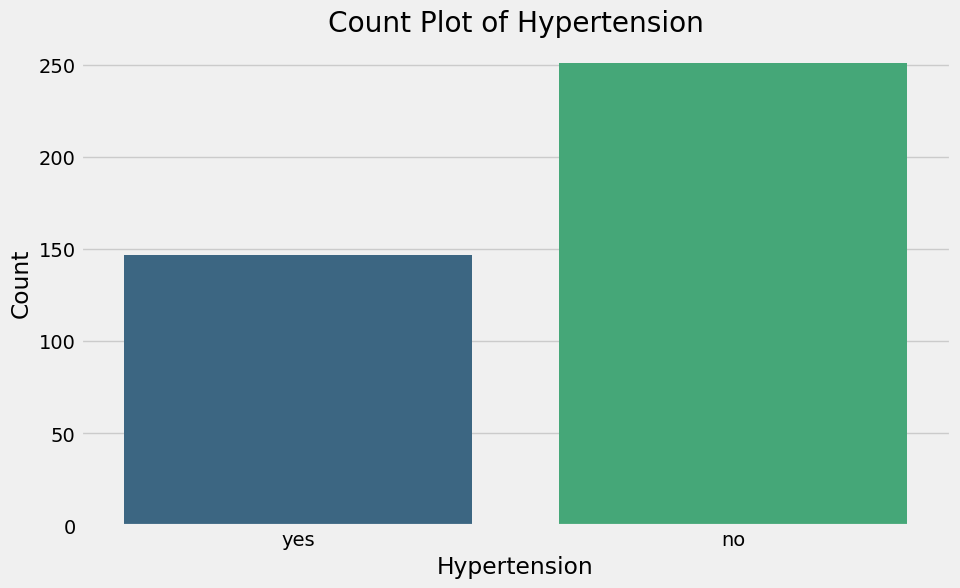

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'hypertension',data =df,palette ='viridis' )
plt.title('Count Plot of Hypertension')
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.show()

In [ ]:
# approximately 150 people have hypertension

# boxplot
1. it will give outliars
2. outliars are extreme value

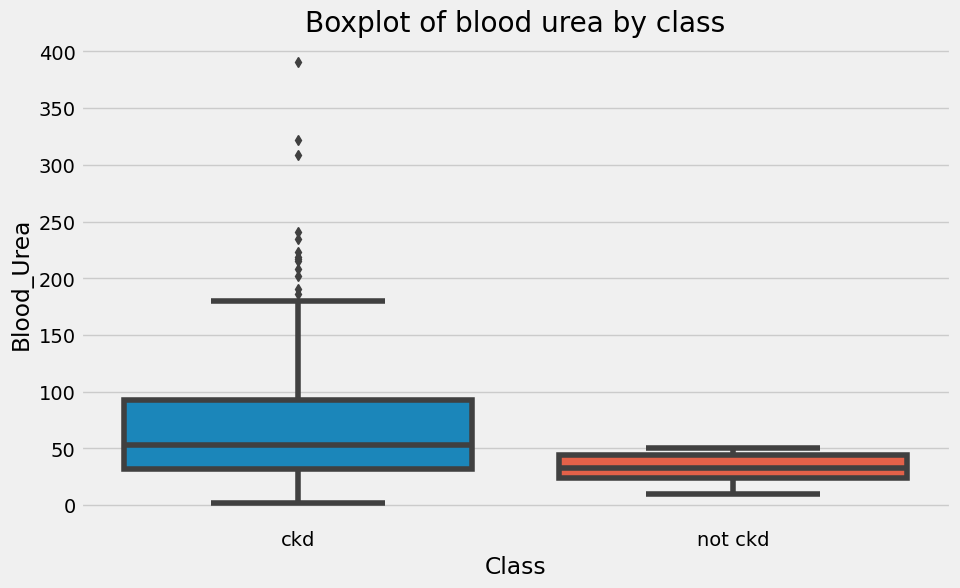

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='class',y = 'blood_urea',data=df)
plt.xlabel("Class")
plt.ylabel("Blood_Urea")
plt.title("Boxplot of blood urea by class")
plt.show()

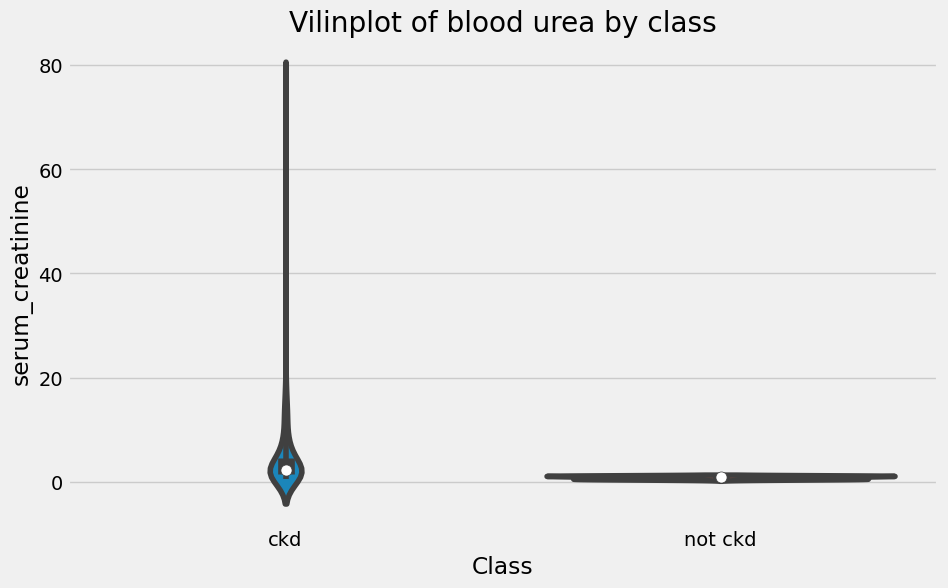

In [39]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y = 'serum_creatinine',data=df)
plt.xlabel("Class")
plt.ylabel("serum_creatinine")
plt.title("Violinplot of serum_creatinine by class")
plt.show()

In [40]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

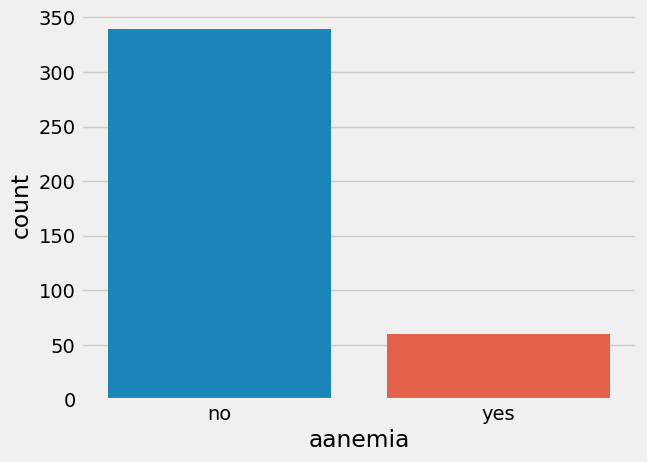

In [42]:
sns.countplot(x='aanemia',data=df)

In [43]:
df.appetite

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

<Axes: ylabel='count'>

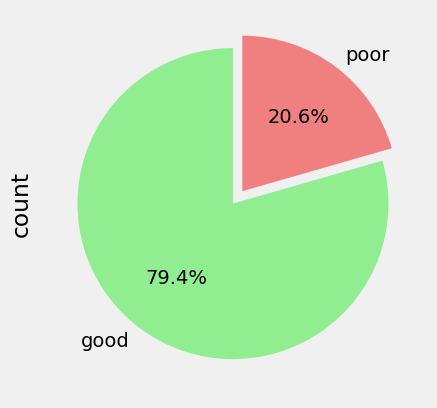

In [44]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%',explode = (0,0.1),startangle=90,colors=['lightgreen','lightcoral'])

In [ ]:
# 79.4% people have good appetite

<Axes: ylabel='count'>

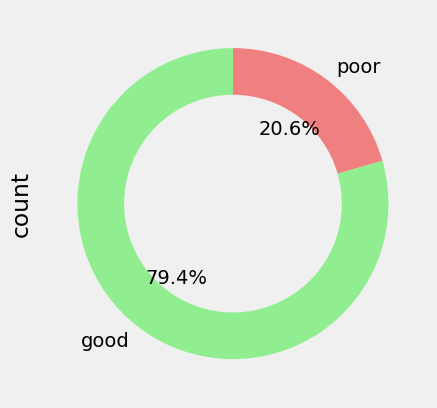

In [46]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.3),startangle=90,colors=['lightgreen','lightcoral'])

<Axes: xlabel='peda_edema', ylabel='count'>

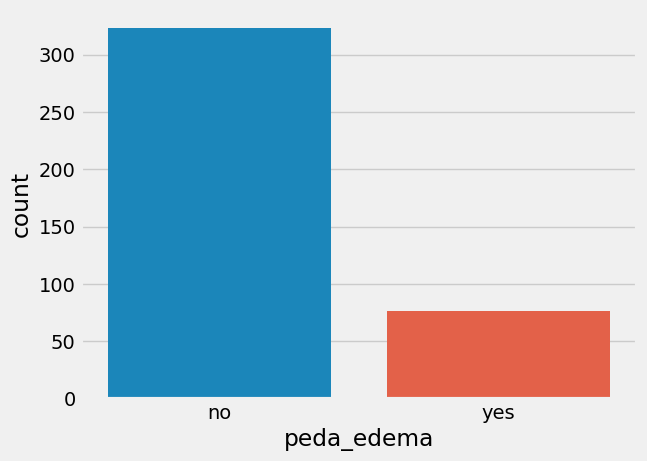

In [47]:
sns.countplot(x='peda_edema',data=df)

In [48]:
# how many people has cronic diseases and hypertension with poor appetite

# how can be one by one if we have thousands columns

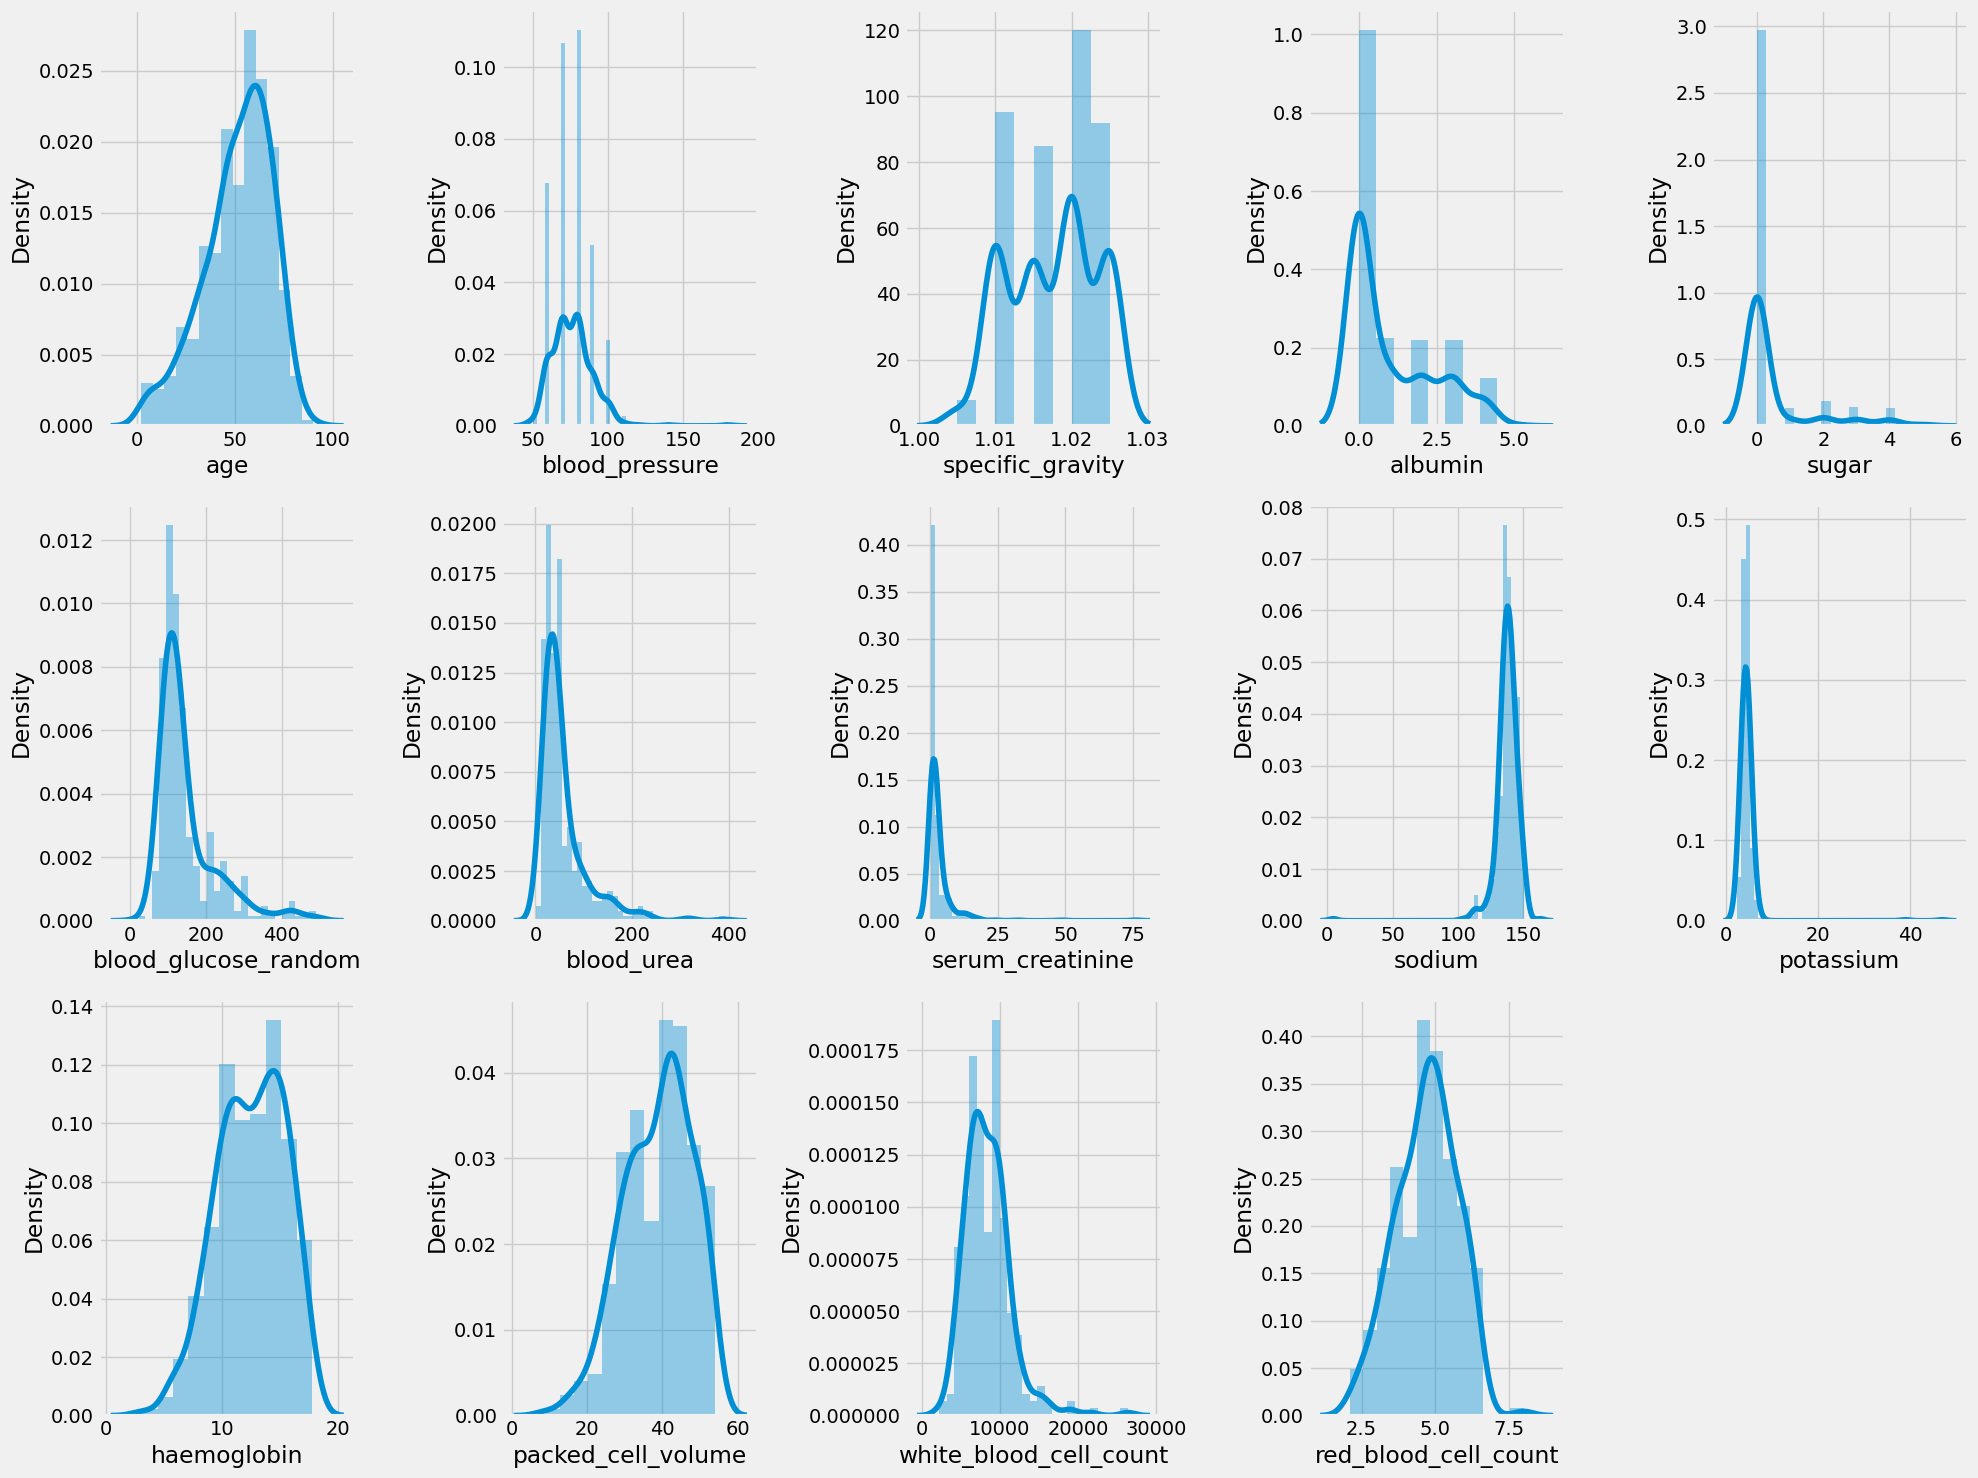

In [51]:
plt.figure(figsize = (20,15))
plotnumber = 1

for col in num_cols:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber  += 1
    
plt.tight_layout()
plt.show()
    

# what will happened if have thousands of columns

In [53]:
def kde(col):
    grid = sns.FacetGrid(df,hue = 'class',height=6,aspect =2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()

In [55]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

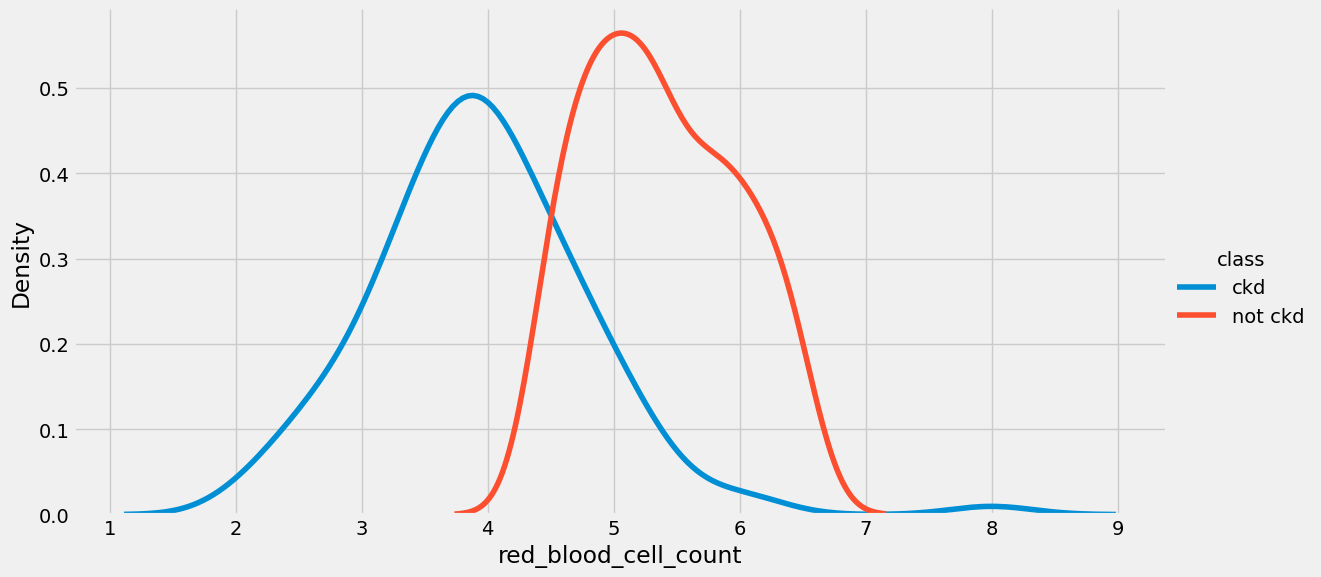

In [56]:
kde('red_blood_cell_count')

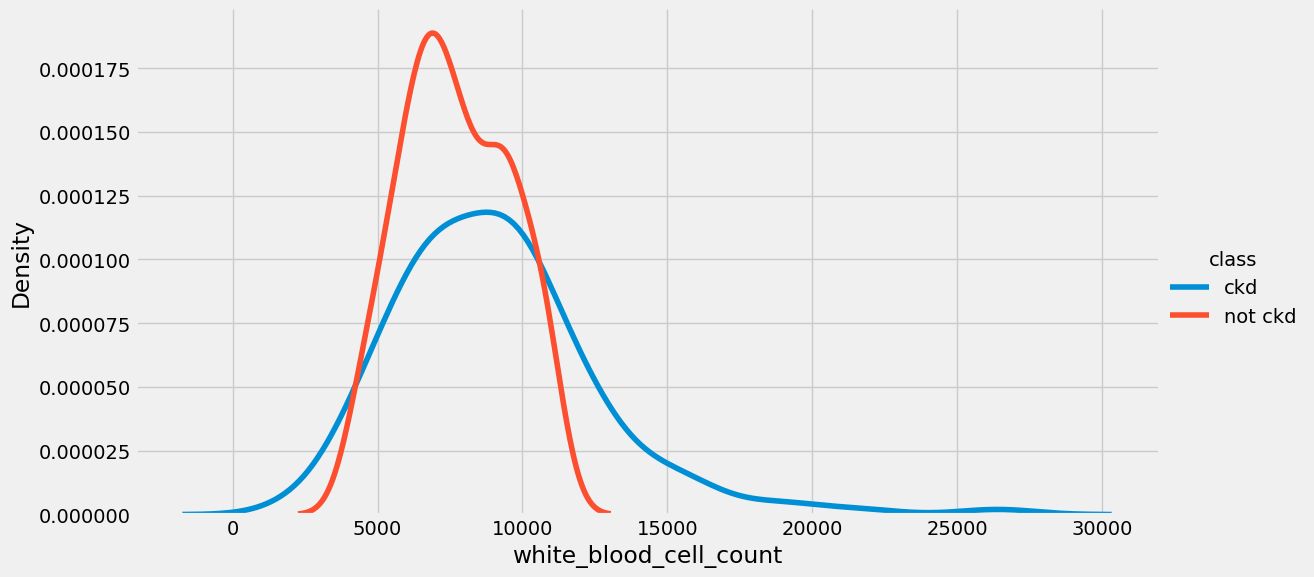

In [57]:
kde('white_blood_cell_count')

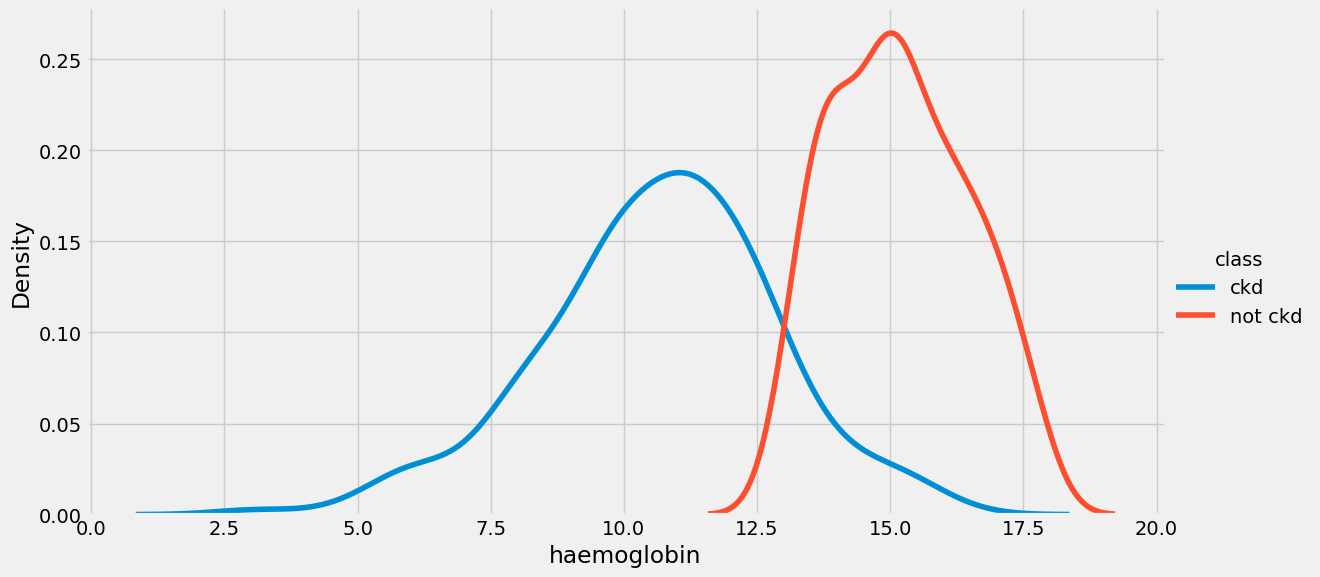

In [59]:
kde('haemoglobin')

In [60]:
def violin(col):
    fig = px.violin(df,y=col,x='class',box=True,template = 'plotly_dark')
    return fig.show()

In [61]:
violin('haemoglobin')

#inisghts
1. outliers are present,3.1and 4,8,16.1 for class 0

In [63]:
violin('specific_gravity')

# Let's see Two Variable or bivariate

<Axes: xlabel='age', ylabel='blood_pressure'>

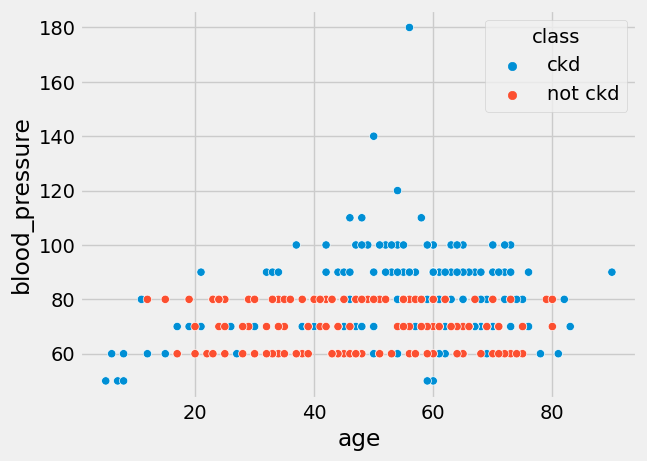

In [64]:
sns.scatterplot(x ='age',y = 'blood_pressure',data=df,hue = 'class')

In [65]:
# most of people having high bp causes cronic diseases causes

# Stacked Bar Chart

Text(0.5, 1.0, 'Stacked diabetes_mellitus and hypertension')

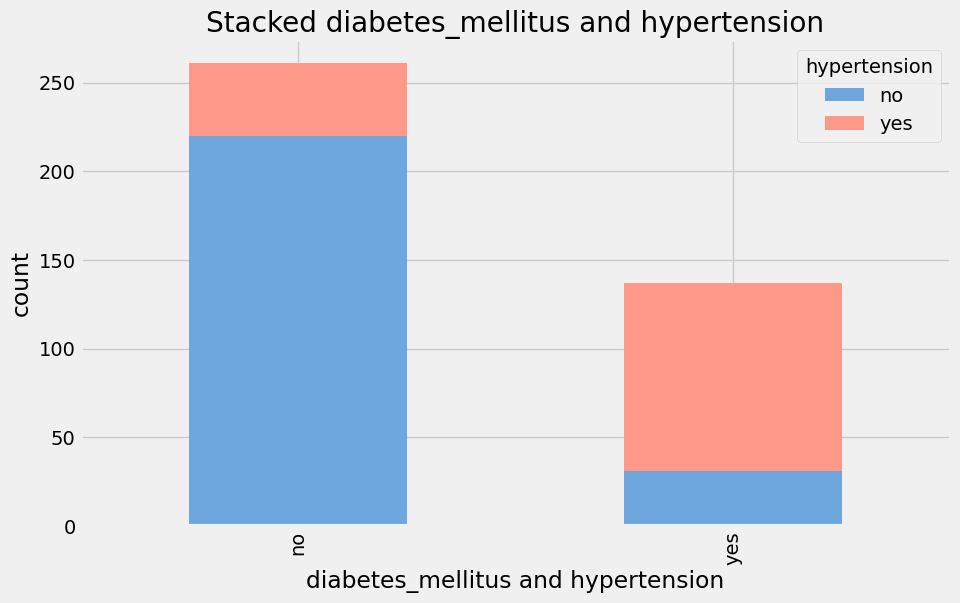

In [82]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'],df['hypertension'])
diabetes_hypertension.plot(kind='bar',stacked = True,color = ['#6DA7DE','#FF9A8B'],figsize = (10,6))

plt.xlabel(('diabetes_mellitus and hypertension'))
plt.ylabel('count')
plt.legend(title='hypertension')
plt.title("Stacked diabetes_mellitus and hypertension")

In [112]:
def scatter(col1,col2):
    fig = px.scatter(df,x=col1,y = col2, color='class',template = 'plotly_dark')
    return fig.show()

In [113]:
scatter('haemoglobin','packed_cell_volume')

# Multivariate analysis

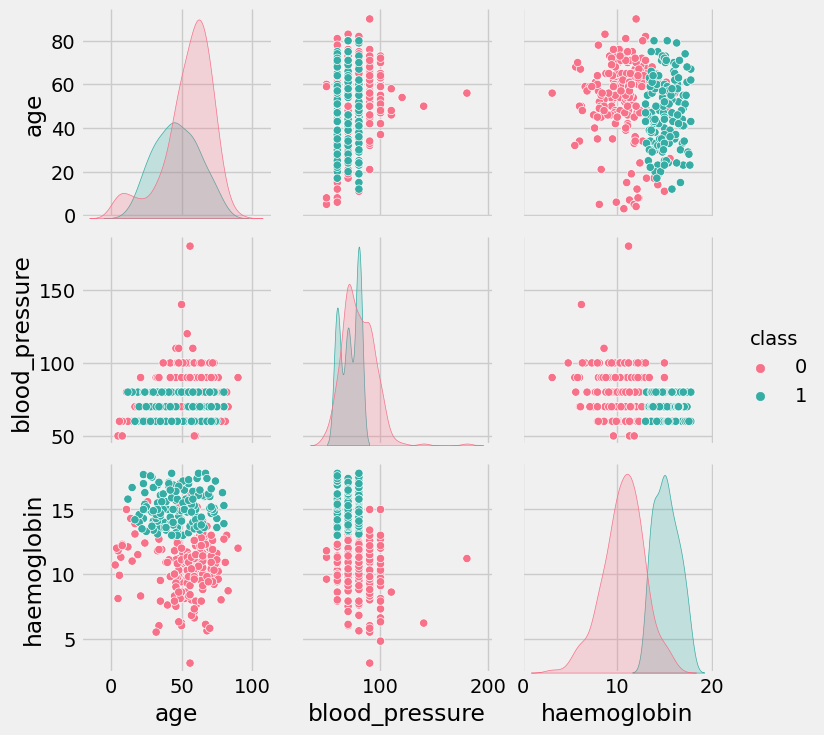

In [111]:
selected_columns = ['age','blood_pressure','haemoglobin','class']
sns.pairplot(df[selected_columns],hue = 'class',palette = 'husl')

In [ ]:
# correlation: its show the +ve or -ve relationship b/w age and bp or others

In [114]:
df[selected_columns].corr()

age  blood_pressure  haemoglobin     class
age             1.000000        0.159480    -0.192928 -0.227268
blood_pressure  0.159480        1.000000    -0.306540 -0.294077
haemoglobin    -0.192928       -0.306540     1.000000  0.768919
class          -0.227268       -0.294077     0.768919  1.000000

<Axes: >

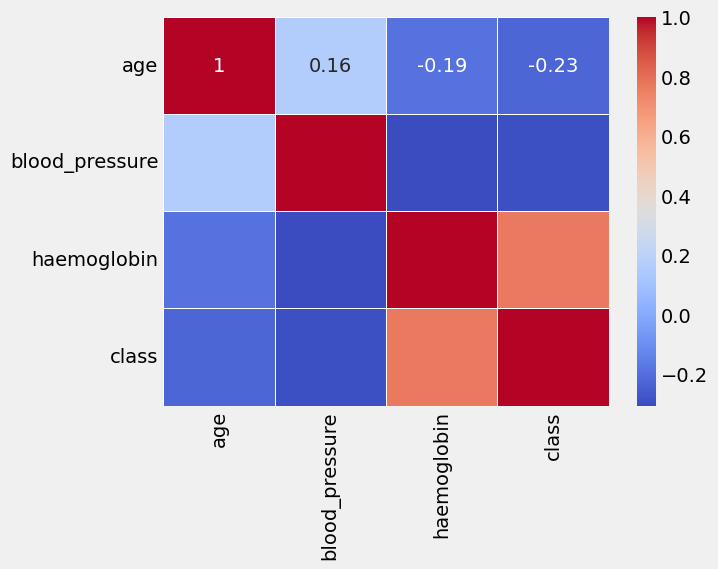

In [116]:
sns.heatmap(df[selected_columns].corr(),annot = True,cmap = 'coolwarm',linewidth = .5)

In [120]:
import plotly.graph_objects as go
heatmap_data = df[selected_columns].corr()

fig = go.Figure(data=go.Heatmap(z = heatmap_data.values,
                               x = heatmap_data.columns,
                                y = heatmap_data.index,
                               colorscale = 'viridis'))

fig.update_layout(title = "Intractive Heatmap of Correlation Matrix")
fig.show()

In [122]:
fig = px.scatter_3d(df,x='age',y='blood_pressure',z = 'serum_creatinine',color = 'haemoglobin',
                   title = "3D Scatter Plot with Color Gradient")
fig.show()